In [1]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
pipe_3_4 = joblib.load('decisiontree_full_3_4.pkl')
pipe_6_7 = joblib.load('decisiontree_full_6_7.pkl')

In [3]:
X_6_7 = np.load('X_6_7.npy')
y_6_7 = np.load('y_6_7.npy')

In [4]:
y_6_7_pred = pipe_3_4.predict(X_6_7)

In [5]:
# REC curve
def rec(m, n, tol):
    if not type(m) == 'numpy.ndarray':
        m = np.array(m) #change m to a np array
    if not type(n) == 'numpy.ndarray':
        n = np.array(n) #change n to a np array

    l = m.size
    percent = 0
    for i in range(l):
        #if np.abs(10**m[i]-10**n[i])<=tol:
        #if abs(n[i] - m[i])**2 <= tol/100:
        #if abs(n[i] - m[i])/n[i] <= tol/100:
        if max(0, abs(n[i] - m[i])-tol/100 ) <= tol/100:
            percent+=1
    return 100*(percent/l)

In [6]:
#print("RMSE for linear regression (with scaling):", np.sqrt(np.mean((y_6_7-y_6_7_pred)**2)))
#print()

tol_max = 50
rec_6_7=[]

for i in range(tol_max):
    rec_6_7.append(rec(y_6_7_pred, y_6_7, i))

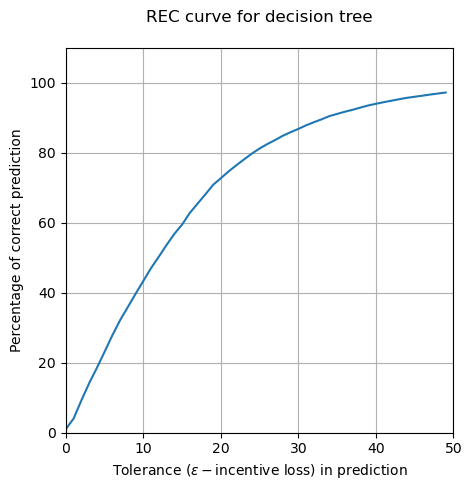

In [7]:
plt.figure(figsize=(5,5))
plt.title("REC curve for decision tree\n")
plt.xlabel("Tolerance ($\epsilon-$incentive loss) in prediction")
plt.ylabel("Percentage of correct prediction")
plt.xticks([i*5 for i in range(tol_max+1)])
plt.ylim(-10,100)
plt.yticks([i*20 for i in range(6)])
plt.grid(True)
plt.plot(range(tol_max),rec_6_7)
#plt.legend()
plt.ylim(0, 110)
plt.xlim(0, 50)
#plt.xticks([0,20,40,60,80,100])
plt.xticks([0,10,20,30,40,50])
plt.yticks([0,20,40,60,80,100])
plt.show()

In [8]:
X_3_4 = np.load('X_3_4.npy')
y_3_4 = np.load('y_3_4.npy')

In [9]:
y_3_4_pred = pipe_6_7.predict(X_3_4)

In [10]:
rec_3_4=[]

for i in range(tol_max):
    rec_3_4.append(rec(y_3_4_pred, y_3_4, i))

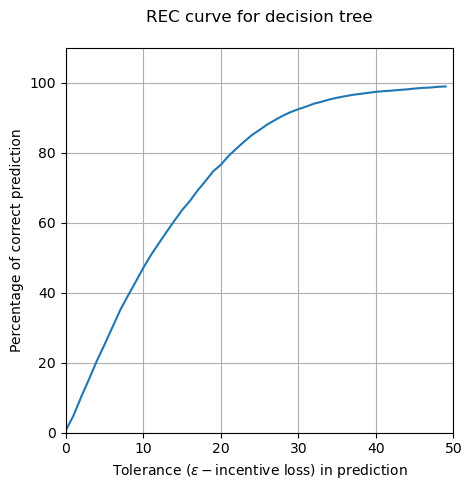

In [11]:
plt.figure(figsize=(5,5))
plt.title("REC curve for decision tree\n")
plt.xlabel("Tolerance ($\epsilon-$incentive loss) in prediction")
plt.ylabel("Percentage of correct prediction")
plt.xticks([i*5 for i in range(tol_max+1)])
plt.ylim(-10,100)
plt.yticks([i*20 for i in range(6)])
plt.grid(True)
plt.plot(range(tol_max),rec_3_4)
#plt.legend()
plt.ylim(0, 110)
plt.xlim(0, 50)
#plt.xticks([0,20,40,60,80,100])
plt.xticks([0,10,20,30,40,50])
plt.yticks([0,20,40,60,80,100])
plt.show()